## VGG16 Training from Scratch on Ear Images

4 datasets

In [1]:
import keras,os
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D ,Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop
import numpy as np

Using TensorFlow backend.
/home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sol/.virtualenvs/maskrc

In [2]:
ROOT_DIR = os.path.abspath("../../")
DS_DIR = os.path.join(ROOT_DIR, "Datasets/merge_dataset")
DS_train_DIR = os.path.join(DS_DIR, "train")
DS_test_DIR = os.path.join(DS_DIR, "val")
img_width, img_height = 224, 224

In [3]:
trdata = ImageDataGenerator(
    rescale=1./255.)
traindata = trdata.flow_from_directory(
    directory=DS_train_DIR,
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='binary')

tsdata = ImageDataGenerator(
    rescale=1./255.)
testdata = tsdata.flow_from_directory(
    directory=DS_test_DIR, 
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='binary')

Found 88086 images belonging to 503 classes.
Found 37822 images belonging to 503 classes.


In [4]:
set_size = 503   #clases

### Set the model

In [5]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

W1119 15:31:11.328254 140058276333376 deprecation_wrapper.py:119] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1119 15:31:11.337907 140058276333376 deprecation_wrapper.py:119] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 15:31:11.339570 140058276333376 deprecation_wrapper.py:119] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1119 15:31:11.358664 140058276333376 deprecation_wrapper.py:119] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please us

In [6]:
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f61d03b1940> False
<keras.layers.convolutional.Conv2D object at 0x7f61607f9a20> True
<keras.layers.convolutional.Conv2D object at 0x7f61607f9860> True
<keras.layers.pooling.MaxPooling2D object at 0x7f613c618a90> True
<keras.layers.convolutional.Conv2D object at 0x7f613c618b38> True
<keras.layers.convolutional.Conv2D object at 0x7f61607f9ac8> True
<keras.layers.pooling.MaxPooling2D object at 0x7f61607b9cc0> True
<keras.layers.convolutional.Conv2D object at 0x7f61607b18d0> True
<keras.layers.convolutional.Conv2D object at 0x7f613ea6d278> True
<keras.layers.convolutional.Conv2D object at 0x7f613ea6db38> True
<keras.layers.pooling.MaxPooling2D object at 0x7f613dabef28> True
<keras.layers.convolutional.Conv2D object at 0x7f613dabea90> True
<keras.layers.convolutional.Conv2D object at 0x7f613da6a128> True
<keras.layers.convolutional.Conv2D object at 0x7f613da6aeb8> True
<keras.layers.pooling.MaxPooling2D object at 0x7f613da1fc50> True
<keras.

In [7]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(Flatten())
model.add(Dense(4096, activation='relu', name='fc1'))
#model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', name='fc2'))
#model.add(Dropout(0.5))
model.add(Dense(set_size, activation='softmax', name='predictions'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 503)               2060791   
Total params: 136,321,335
Trainable params: 136,321,335
Non-trainable params: 0
_________________________________________________________________


In [9]:
#### Dogs and cats test

#model.compile(optimizer=Adam(lr=0.001), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])  #vgg16_1.h5--> 58%
#model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])  #vgg16_2.h5--> 99%  #with 2 dropout layers
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])  #vgg16_2.h5--> 99.37%  #without dropout layers
#model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])  #vgg16_2.h5--> 98.75%
#model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])  #vgg16_2.h5--> 55%
#model.compile(optimizer=RMSprop(lr=1e-4), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])  #vgg16_3.h5--> 55%

W1119 15:31:20.746662 140058276333376 deprecation_wrapper.py:119] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "vgg16_3.h5", 
    monitor='val_acc', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False, 
    mode='auto', 
    period=1)

early = EarlyStopping(
    monitor='val_acc', 
    min_delta=0, 
    patience=25,
    #if it doesn’t see any rise in validation accuracy in 20,  the model will stop 
    verbose=1, 
    mode='auto')

hist = model.fit_generator(
    steps_per_epoch=100,
    generator=traindata, 
    validation_data= testdata, 
    validation_steps=10,
    epochs=200,
    callbacks=[checkpoint,early])

W1119 15:31:24.891207 140058276333376 deprecation.py:323] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
100/100 [==============================] - 49s 494ms/step - loss: 6.2575 - acc: 0.0013 - val_loss: 6.2229 - val_acc: 0.0031

Epoch 00001: val_acc improved from -inf to 0.00313, saving model to vgg16_3.h5
Epoch 2/200
100/100 [==============================] - 44s 436ms/step - loss: 6.2205 - acc: 0.0022 - val_loss: 6.2201 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00313
Epoch 3/200
100/100 [==============================] - 44s 438ms/step - loss: 6.2214 - acc: 0.0019 - val_loss: 6.2184 - val_acc: 0.0063

Epoch 00003: val_acc improved from 0.00313 to 0.00625, saving model to vgg16_3.h5
Epoch 4/200
100/100 [==============================] - 44s 437ms/step - loss: 6.2190 - acc: 0.0028 - val_loss: 6.2181 - val_acc: 0.0031

Epoch 00004: val_acc did not improve from 0.00625
Epoch 5/200
100/100 [==============================] - 44s 441ms/step - loss: 6.2176 - acc: 0.0041 - val_loss: 6.2182 - val_acc: 0.0031

Epoch 00005: val_acc did not improve from 0.00625


Epoch 41/200
100/100 [==============================] - 44s 438ms/step - loss: 0.6142 - acc: 0.8419 - val_loss: 0.5642 - val_acc: 0.8719

Epoch 00041: val_acc did not improve from 0.88125
Epoch 42/200
100/100 [==============================] - 44s 440ms/step - loss: 0.5474 - acc: 0.8591 - val_loss: 0.6157 - val_acc: 0.8250

Epoch 00042: val_acc did not improve from 0.88125
Epoch 43/200
100/100 [==============================] - 44s 443ms/step - loss: 0.5234 - acc: 0.8678 - val_loss: 0.4584 - val_acc: 0.8750

Epoch 00043: val_acc did not improve from 0.88125
Epoch 44/200
100/100 [==============================] - 44s 443ms/step - loss: 0.4842 - acc: 0.8747 - val_loss: 0.5449 - val_acc: 0.8688

Epoch 00044: val_acc did not improve from 0.88125
Epoch 45/200
100/100 [==============================] - 44s 442ms/step - loss: 0.4800 - acc: 0.8762 - val_loss: 0.4933 - val_acc: 0.8531

Epoch 00045: val_acc did not improve from 0.88125
Epoch 46/200
100/100 [==============================] - 44s 

100/100 [==============================] - 44s 440ms/step - loss: 0.1386 - acc: 0.9591 - val_loss: 0.2090 - val_acc: 0.9406

Epoch 00083: val_acc did not improve from 0.94063
Epoch 84/200
100/100 [==============================] - 44s 440ms/step - loss: 0.0874 - acc: 0.9741 - val_loss: 0.2302 - val_acc: 0.9375

Epoch 00084: val_acc did not improve from 0.94063
Epoch 85/200
100/100 [==============================] - 44s 439ms/step - loss: 0.0844 - acc: 0.9769 - val_loss: 0.3064 - val_acc: 0.9344

Epoch 00085: val_acc did not improve from 0.94063
Epoch 86/200
100/100 [==============================] - 44s 440ms/step - loss: 0.0791 - acc: 0.9809 - val_loss: 0.2618 - val_acc: 0.9313

Epoch 00086: val_acc did not improve from 0.94063
Epoch 87/200
100/100 [==============================] - 44s 440ms/step - loss: 0.1204 - acc: 0.9669 - val_loss: 0.2896 - val_acc: 0.9313

Epoch 00087: val_acc did not improve from 0.94063
Epoch 88/200
100/100 [==============================] - 44s 438ms/step - 

100/100 [==============================] - 44s 438ms/step - loss: 0.0170 - acc: 0.9950 - val_loss: 0.0888 - val_acc: 0.9781

Epoch 00126: val_acc improved from 0.96875 to 0.97813, saving model to vgg16_3.h5
Epoch 127/200
100/100 [==============================] - 44s 437ms/step - loss: 0.0364 - acc: 0.9897 - val_loss: 0.4400 - val_acc: 0.9125

Epoch 00127: val_acc did not improve from 0.97813
Epoch 128/200
100/100 [==============================] - 44s 437ms/step - loss: 0.0510 - acc: 0.9859 - val_loss: 0.2401 - val_acc: 0.9531

Epoch 00128: val_acc did not improve from 0.97813
Epoch 129/200
100/100 [==============================] - 44s 439ms/step - loss: 0.0541 - acc: 0.9828 - val_loss: 0.2954 - val_acc: 0.9531

Epoch 00129: val_acc did not improve from 0.97813
Epoch 130/200
100/100 [==============================] - 44s 440ms/step - loss: 0.0610 - acc: 0.9853 - val_loss: 0.1115 - val_acc: 0.9594

Epoch 00130: val_acc did not improve from 0.97813
Epoch 131/200
100/100 [==============

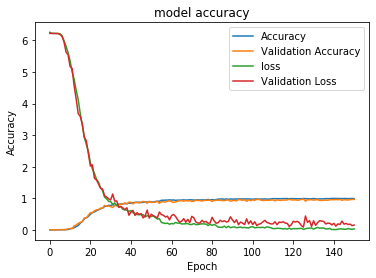

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()
plt.savefig('plot.png')
plt.close()

In [ ]:
img = image.load_img("image.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

### Model generation using Imagenet weights -> 4096 Feature Vector

In [14]:
from keras.models import Model
model_extractor = Model(input=model.input, output=model.get_layer('fc2').output)
model_extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
Total params: 134,260,544
Trainable params: 134,260,544
Non-trainable params: 0
_________________________________________________________________


/home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("vg..., outputs=Tensor("fc...)`
  


### Image Feature Extraction

In [9]:
#def getVector():
    #return np.array([1,2,3,5,6,7,8,9,10])


4096

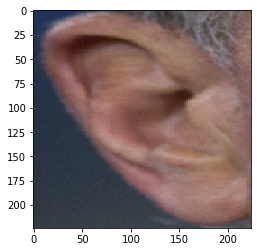

In [24]:
from keras.preprocessing import image
img = image.load_img("/home/sol/Documentos/MCS/LocalThesisProject/Datasets/awe/awe_070/01.png", target_size=(224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = model_extractor.predict(img)
len(output[0])

In [60]:

from glob import glob
ROOT_DIR = os.path.abspath("../../")
TEST_DIR = os.path.join(ROOT_DIR, "Datasets/cvle_test")

In [61]:
vgg16_feature_list = []
for (dirpath, u_dirnames, filenames) in os.walk(TEST_DIR):
    dirnames = sorted(u_dirnames)
    for i in range(0,len(dirnames)):
        FILE_DIR = os.path.join(TEST_DIR, str(dirnames[i]))
        files = glob(FILE_DIR+'/*.png') 
        for j in range (0,len(files)):
            #print(files[j])
            image_class = np.array([int(str(dirnames[i][5:]))])
            img = image.load_img(files[j], target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            fc2_features = model_extractor.predict(img_data)
            #vgg16_feature = model.predict(img_data)
            image_vector = np.array(fc2_features)            
            #image_vector = getVector()                       
            vgg16_feature_np = np.concatenate((image_class, image_vector[0]), axis=0)                                  
            vgg16_feature_list.append(vgg16_feature_np.flatten())            
    break

#print(len(vgg16_feature_list))
#print(len(vgg16_feature_np))
head = []
head.append('class')
for i in range(1, len(vgg16_feature_np)):
    head.append('v'+str(i))

head_np = []
head_np.append(head)
#print(head_np)

In [55]:
print(head_np)

[['class', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136', 'v137', '

### Build CSV file

In [62]:
import csv
with open('vgg16_fulltrained_cvle.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(head_np)
    writer.writerows(vgg16_feature_list)
csvFile.close()

### Model generation using Imagenet weights -> ~25K Feature Vector

In [6]:
model = VGG16(weights='imagenet', include_top=False)
model.summary()

W0821 10:37:36.695448 140419175221056 deprecation_wrapper.py:119] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 10:37:36.711848 140419175221056 deprecation_wrapper.py:119] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 10:37:36.714570 140419175221056 deprecation_wrapper.py:119] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 10:37:36.737740 140419175221056 deprecation_wrapper.py:119] From /home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please us

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [9]:
vgg16_feature_list = []
for (dirpath, u_dirnames, filenames) in os.walk(DS_DIR):
    dirnames = sorted(u_dirnames)
    for i in range(0,len(dirnames)):
        FILE_DIR = os.path.join(DS_DIR, str(dirnames[i]))
        files = glob(FILE_DIR+'/*.png') 
        for j in range (0,len(files)):
            #print(files[j])
            image_class = np.array([int(str(dirnames[i]))])
            img = image.load_img(files[j], target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)
            vgg16_feature = model.predict(img_data)
            image_vector = np.array(vgg16_feature.flatten())            
            vgg16_feature_np = np.concatenate((image_class, image_vector), axis=0)                                  
            vgg16_feature_list.append(vgg16_feature_np)            
    break

#print(len(vgg16_feature_list))
#print(len(vgg16_feature_np))
head = []
head.append('class')
for i in range(1, len(vgg16_feature_np)):
    head.append('v'+str(i))

head_np = []
head_np.append(head)
#print(head_np)